In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Plotting figures of Sec. V.C ($X=2$ Teukolsky wave) in arXiv: [2308.10361](https://arxiv.org/pdf/2308.10361)

In [2]:
import numpy as np
import matplotlib.pyplot as pl
from scipy import interpolate
import h5py
import qnm
from numpy import vectorize
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from scipy.optimize import least_squares
import sys
pl.rcParams.update({'text.usetex': False,
                     'font.family': 'serif',
                     'font.serif': ['Georgia'],
                     'mathtext.fontset': 'cm',
                     'lines.linewidth': 1.5,
                     'font.size': 14,
                     'xtick.labelsize': 'medium',
                     'ytick.labelsize': 'medium',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'axes.grid': False,
                     'grid.alpha': 0.73,
                     'lines.markersize': 12,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 12,
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'savefig.dpi': 80,
                     'pdf.compression': 9})

Reproducing Fig. 11 in arXiv: [2308.10361](https://arxiv.org/pdf/2308.10361)

In [3]:
ccm_psi0 = np.loadtxt('377ccm/InnerPsi0.dat')
ccm_psi4 = np.loadtxt('377ccm/Psi4.dat')
cce_psi4 = np.loadtxt('cce/Psi4.dat')

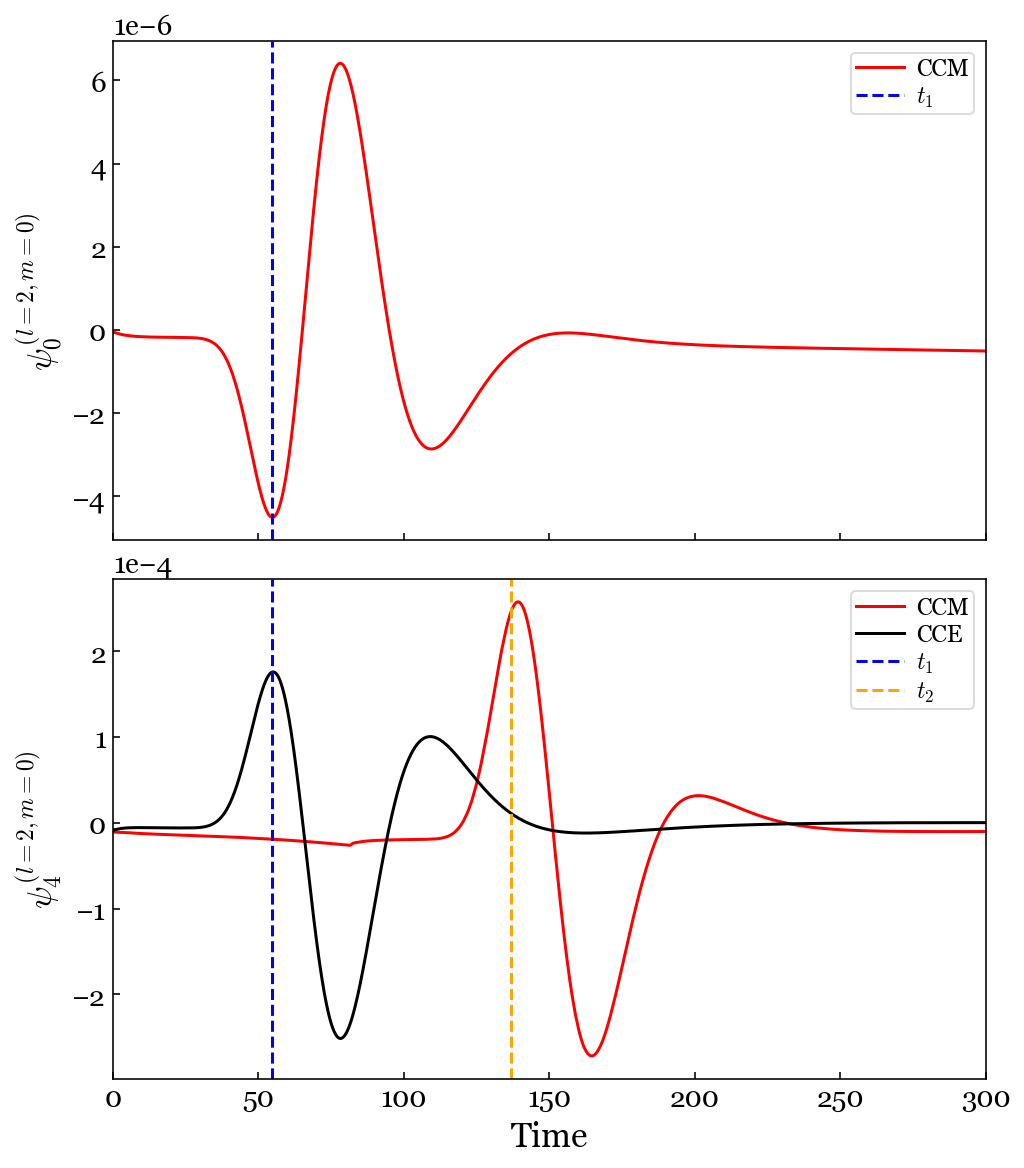

In [4]:
fig, ax=pl.subplots(2,1,figsize=(7,8), constrained_layout=True, sharex=True)

ax[0].plot(ccm_psi0[:,0], ccm_psi0[:,1], label='CCM', color='r')
ax[0].set_ylabel(r'$\psi^{(l=2,m=0)}_{0}$')
ax[0].axvline(x=ccm_psi0[:,0][np.argmin(ccm_psi0[:,1])],\
              ls='--', color='b', label=r'$t_1$')
ax[0].legend()

ax[1].plot(ccm_psi4[:,0], ccm_psi4[:,1], label='CCM', color='r')
ax[1].plot(cce_psi4[:,0], cce_psi4[:,1], label='CCE', color='k')
ax[1].set_ylabel(r'$\psi_{4}^{(l=2,m=0)}$')
ax[1].set_xlim(0, 300)
ax[1].set_xlabel('Time', fontsize=17)
ax[1].axvline(x=ccm_psi0[:,0][np.argmin(ccm_psi0[:,1])], ls='--',\
              color='b', label=r'$t_1$')
ax[1].axvline(x=41*2+ccm_psi0[:,0][np.argmin(ccm_psi0[:,1])], ls='--',\
              color='orange', label=r'$t_2$') # 41 is the radius of the Cauchy domain
ax[1].legend()
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

Reproducing Fig. 12 in arXiv: [2308.10361](https://arxiv.org/pdf/2308.10361)

In [5]:
constrainccm377 = np.loadtxt('377ccm/Norms.dat')
constrainccm366 = np.loadtxt('366ccm/Norms.dat')
constrainccm355 = np.loadtxt('355ccm/Norms.dat')

/var/folders/20/8zqp3zsn0zz37jw30nm46pnh0000gn/T/ipykernel_88286/3227868517.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  pl.subplots_adjust(hspace=0.02)


(-2.0, 300.0)

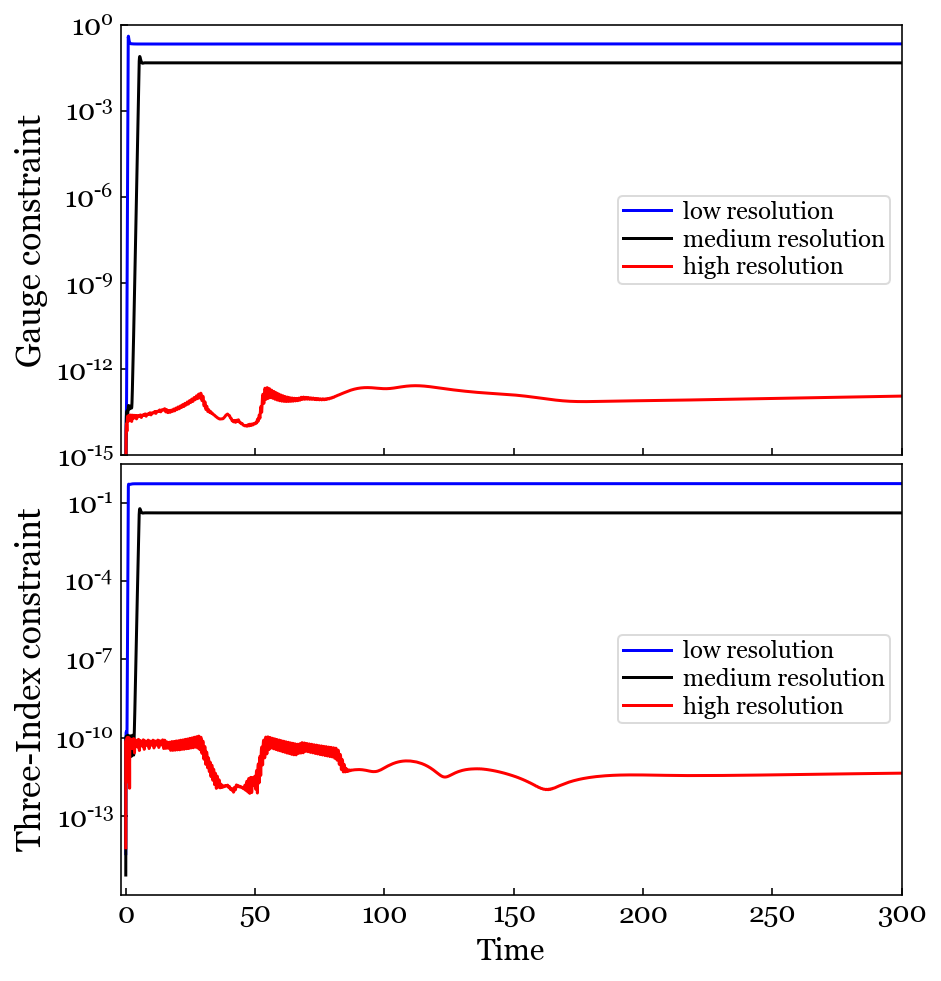

In [6]:
fig, ax=pl.subplots(2,1,figsize=(7,8), constrained_layout=True, sharex=True)
pl.subplots_adjust(hspace=0.02)

indd=3
ax[0].semilogy(constrainccm355[:,0], constrainccm355[:,indd],\
               'b', label='low resolution')
ax[0].semilogy(constrainccm366[:,0], constrainccm366[:,indd],\
               'k', label='medium resolution')
ax[0].semilogy(constrainccm377[:,0], constrainccm377[:,indd],\
               'r', label='high resolution')
ax[0].set_ylabel('Gauge constraint')
ax[0].set_ylim(1e-15, 1)
ax[0].legend(loc='center right')

indd=4
ax[1].semilogy(constrainccm355[:,0], constrainccm355[:,indd],\
               'b', label='low resolution')
ax[1].semilogy(constrainccm366[:,0], constrainccm366[:,indd],\
               'k', label='medium resolution')
ax[1].semilogy(constrainccm377[:,0], constrainccm377[:,indd],\
               'r', label='high resolution')
ax[1].set_ylabel('Three-Index constraint')
ax[1].legend(loc='center right')
ax[1].set_xlabel('Time', fontsize=15)
ax[1].set_xlim(-2,300)